# Hackacity 2024
## [SOLUTION NAME]
#### Team: PLICity
#### Authors:
- Igor Carvalho
- José Cabeda
- Lirielly Vitorugo
- Pedro Machado

# Instructions
- The purpose of this notebook is to provide a detailed description so that the technical and business jury can have an overview of the technical and non-technical aspects and how they interconnect.
- To use the template, you must make a copy and fill in the team name and the challenge title.
- The cells containing the instructions should be deleted, but all headers must be kept.
- All technical information should be included in this report (e.g., code, queries, graphs, tools used, parameters, etc.). If necessary, additional files can be added to the OneDrive folder, with references to those files included in this report.

# Tip
- The technical and business jury will need to evaluate several notebooks, so it’s important to maintain a clear line of thought within the notebook without overloading it with too many similar graphs or visuals that do not add value to the work. On the other hand, it’s important to show that the work done is thorough.
- Therefore, we recommend using the annex section to include code that was produced along with its description but might be unnecessary noise for the jury (e.g., tested models that didn’t work, EDA with very similar results between variables, etc.).


# 1 - Introduction


### Instructions:
Contextualization and explanation of the problem and the proposed solution. Should only contain text or text and images.

# 2 - Possible threat analysis before anonymization

### Instructions:
This section should cover a threat analysis of the dataset from the privacy perspective and it's quantification.

Important notes:
- Only this section is evaluated for the data privacy award;
- No code is needed for this section;
- A good quantification of the threat is valuade by the jury;
- Include any references that is important.

# 3 - Anonymization process

### Instructions

Based on the previous threat assesment, propose any anonymization techniques you might find helpful.

Include all the code and proof needed that the threat has been mitigated.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
sns.set_theme(style="dark", rc={'figure.figsize':(11,8)})

In [3]:
df_wifi = pd.read_parquet("Hackacity2024Data/hackacity_wifi_data.csv")

In [4]:
df_wifi.head()

,Unnamed: 0,acctsessionid,acctstarttime,upload,download,acctsessiontime,callingstationid,calledstationid,calledstation_ssid
0,0,fbfe95a31b975faa4b79968f95d834f2204ff050c4cb17...,2024-09-18 14:00:00,0,0,0.0,412a9bf588f4a609cd8e4c8fc8b69482d6f69079f274de...,e0c8b4c72e48ff3726f36a987f29bab9b3d718646b3a6e...,eduroam
1,1,7330b1f18b414f72c4895700952fb9f2f5aa4cd3c15369...,2024-09-18 13:00:00,0,0,0.0,d5f9cf3d6db078eec48f1f235072ddcec82917cf70aca7...,7b85b2daca64da5d39240d583c6097589a9a5dab4215b0...,eduroam
2,2,8efbb33c1a4b95f434e75cde462caea6dfdf964631744f...,2024-09-12 07:00:00,0,0,6.0,a1b5475191cbe73bff8f88915727f64975a0fd3927337f...,bac16ce82d2706d6346e3929a1a46b4fa8c23af51daa82...,Porto. Free Wi-Fi
3,3,429785416485c487d271060e329442b10e1b965621dc17...,2024-09-12 01:00:00,2,30,32.0,67004872f49151a450a1a06a7b2e9759f247cc87c718fb...,a624b94f6637ac8e51fab1d1d6bc1eca5c8949e4e57783...,eduroam
4,4,147932564d4a91bdf901570a3f379158e0efe674ac55d4...,2024-09-12 02:00:00,0,1,6.0,8fead2e516c0315a13d8a826ee4f0c1e74a256d689a895...,610f3720cc37d9195ab25e780f36690113624f19039fec...,eduroam


In [43]:
df_wifi = df_wifi[(df_wifi.acctsessiontime != 0) & (~df_wifi.acctsessiontime.isna())]

In [19]:
df_wifi["acctstarttime"] = pd.to_datetime(df_wifi["acctstarttime"])
df_wifi["date"] = df_wifi["acctstarttime"].apply(lambda x: x.date())
df_wifi["hour"] = df_wifi["acctstarttime"].apply(lambda x: x.hour)
df_wifi["month"] = df_wifi["acctstarttime"].apply(lambda x: x.month)

In [20]:
df_wifi.head()

,Unnamed: 0,acctsessionid,acctstarttime,upload,download,acctsessiontime,callingstationid,calledstationid,calledstation_ssid,date,hour,month
0,0,fbfe95a31b975faa4b79968f95d834f2204ff050c4cb17...,2024-09-18 14:00:00,0,0,0.0,412a9bf588f4a609cd8e4c8fc8b69482d6f69079f274de...,e0c8b4c72e48ff3726f36a987f29bab9b3d718646b3a6e...,eduroam,2024-09-18,14,9
1,1,7330b1f18b414f72c4895700952fb9f2f5aa4cd3c15369...,2024-09-18 13:00:00,0,0,0.0,d5f9cf3d6db078eec48f1f235072ddcec82917cf70aca7...,7b85b2daca64da5d39240d583c6097589a9a5dab4215b0...,eduroam,2024-09-18,13,9
2,2,8efbb33c1a4b95f434e75cde462caea6dfdf964631744f...,2024-09-12 07:00:00,0,0,6.0,a1b5475191cbe73bff8f88915727f64975a0fd3927337f...,bac16ce82d2706d6346e3929a1a46b4fa8c23af51daa82...,Porto. Free Wi-Fi,2024-09-12,7,9
3,3,429785416485c487d271060e329442b10e1b965621dc17...,2024-09-12 01:00:00,2,30,32.0,67004872f49151a450a1a06a7b2e9759f247cc87c718fb...,a624b94f6637ac8e51fab1d1d6bc1eca5c8949e4e57783...,eduroam,2024-09-12,1,9
4,4,147932564d4a91bdf901570a3f379158e0efe674ac55d4...,2024-09-12 02:00:00,0,1,6.0,8fead2e516c0315a13d8a826ee4f0c1e74a256d689a895...,610f3720cc37d9195ab25e780f36690113624f19039fec...,eduroam,2024-09-12,2,9


In [61]:
# monthly session sum ap
# Configuração para desativar a notação científica
pd.set_option('display.float_format', '{:.0f}'.format)
df_wifi.groupby(['calledstationid', 'month'], as_index=False)['acctsessiontime'].sum().sort_values(by='acctsessiontime', ascending=False)


,calledstationid,month,acctsessiontime
294,4cad16c07e8c4d222c35d87e0e91ca7f748373f1733a74...,9,2222091317
243,4430c37124a740cbd88faa185d3213254c4d45282a21e2...,9,1093043108
231,4117cecd54cd080ae324a47fecd0300ceb1d3a4affb960...,9,1025559923
102,13795871cdbad092bb55f6f6fafcb8fac0cdcc6a68756d...,9,1007112241
10,01b7675673222f705ae8a4d45494d68ae6be119280eee9...,9,953500395
...,...,...,...
704,b15831f032317eb589621ff665db44697ba62a8410f4b3...,10,5
346,565393e2960918f8b61b611ad1f28db8c8d206b682c5f2...,10,5
694,af2a980c906bb2ce9e65f61fd7e296b04168d0c24d8037...,10,4
26,05f902b1222bec67d8ceda40d0e54e267ac45f29b8856f...,10,3


In [44]:
# monthly session sum per user and ap
df_wifi.groupby(['callingstationid', 'calledstationid', 'month'], as_index=False)['acctsessiontime'].sum().sort_values(by='acctsessiontime', ascending=False)

,callingstationid,calledstationid,month,acctsessiontime
787650,30519f9ec479c213fba27de8cecabbe743561ba61de0ac...,3c3d76861294fc3cc91f24bb4371475d70d7c031098fb6...,7,71891993.0
787651,30519f9ec479c213fba27de8cecabbe743561ba61de0ac...,3c3d76861294fc3cc91f24bb4371475d70d7c031098fb6...,8,67648535.0
787652,30519f9ec479c213fba27de8cecabbe743561ba61de0ac...,3c3d76861294fc3cc91f24bb4371475d70d7c031098fb6...,9,65645789.0
787656,30519f9ec479c213fba27de8cecabbe743561ba61de0ac...,699e73a48d40a6bfa12c823b48f627f6afe8c007efae13...,9,51709354.0
4005496,f63d843d48d0a433a2fddae8e06a182b4ed29545b55354...,1f0e40ed226098605a8b5ba0fb68b628913aa12f56c899...,9,51224505.0
...,...,...,...,...
2797166,abf7e97b63eaec8edee7a42f200c2f7e371452e12b13ca...,54b65577b4911dd3f5bc71c8c8253252789c86938ca650...,9,1.0
2337507,8fe3de90060f8dfa0b9d5fd2269b4aacc63638435d548f...,4f6dc1d796ba1733b53641bcee957694bc26bf1426f03d...,7,1.0
1378688,54982843e188eecba8a2b3b5cdfe8be1af73d09e115827...,90262c26680d2525940e71e2cdaaa5604f5844fa4dff93...,8,1.0
3897747,ef993aa59417db3316464fc4672c7beda45ab44d120fca...,54b65577b4911dd3f5bc71c8c8253252789c86938ca650...,8,1.0


In [45]:
# mean of unique users per aps during july, august and september 2024
df_wifi[df_wifi.month.isin([7, 8, 9])].drop_duplicates(subset=['callingstationid', 'calledstationid', 'month']).groupby(['calledstationid', 'month'], as_index=False)['callingstationid'].count().groupby('calledstationid', as_index=False)['callingstationid'].mean().sort_values(by='callingstationid', ascending=False)[:10]

,calledstationid,callingstationid
122,6f2ed2e71e167341cbbce4447d8a9065f8370294352f18...,24794.000000
5,04ca1153de9afc12ec035bf0a1652c0b4cadf9bb5b47d9...,24397.333333
213,c179b136c67ce3996bc38f2684531969dda73ac0ad8e31...,23096.000000
34,1ae875b94679f3bad8501c335fb784ba32bdb01e764046...,23010.000000
113,679871ac7b59c2a7d76be1a74e9a7e3fb224faa494b1fb...,22639.666667
32,17c434b0737e4cd9cee9589874cf7659c78b84861080bc...,20503.000000
44,2b40944c1952a453ce5b81583ff3c9d1f83d4e70a6cb00...,19540.000000
23,116711eb9cb7f81c017f616cf85401dc05a67a9d6244f0...,19253.000000
225,d0ac22a00734c5b33bbc2df7dabc40a5292683115e6e82...,19144.666667
150,90262c26680d2525940e71e2cdaaa5604f5844fa4dff93...,18146.333333


In [46]:
# number of access per user in a day
df_wifi.groupby(['callingstationid', 'calledstationid', 'date'], as_index=False)['calledstationid'].count().sort_values(by='calledstationid', ascending=False)

,callingstationid,date,calledstationid
6183206,ecf39ee7a83baa070c8f68a46657030d156890b7ff8d07...,2024-07-30,109
6183207,ecf39ee7a83baa070c8f68a46657030d156890b7ff8d07...,2024-08-05,101
5466083,d17520e34a85bdc3461d332052cf171b1c7c551744c77f...,2024-07-04,89
5466115,d17520e34a85bdc3461d332052cf171b1c7c551744c77f...,2024-08-20,88
5466114,d17520e34a85bdc3461d332052cf171b1c7c551744c77f...,2024-08-19,85
...,...,...,...
2478382,5ef5e6e5f8f8af487847123d7f24e4daf6650bc0c13e95...,2024-08-06,1
2478381,5ef5e6e5f8f8af487847123d7f24e4daf6650bc0c13e95...,2024-07-04,1
2478380,5ef5e6e5f8f8af487847123d7f24e4daf6650bc0c13e95...,2024-08-08,1
2478379,5ef5e6e5f8f8af487847123d7f24e4daf6650bc0c13e95...,2024-08-02,1


In [54]:
# track of a user during his most active day
#df_wifi.groupby(['callingstationid', 'calledstationid', 'date'], as_index=False)['calledstationid'].count().sort_values(by='calledstationid', ascending=False)['callingstationid'][6183206]
# callingstationid: 'ecf39ee7a83baa070c8f68a46657030d156890b7ff8d0742a781a75698e18267'

# df_wifi[(df_wifi.callingstationid.isin(['ecf39ee7a83baa070c8f68a46657030d156890b7ff8d0742a781a75698e18267'])) & (df_wifi.date == target_date)].sort_values(by='acctstarttime')['calledstationid'].value_counts()
# calledstationid: 
# c75dc851809ee56b61fb7b4905f8e5a9c1930b470e2bd64dffad89d0ca00d76    109
# d792ec78e1974d5aabdcf87389d56b10b74aeadb1215e021dd97bf257181959d    50
target_date = pd.to_datetime('2024-07-30').date()
df_wifi[(df_wifi.callingstationid.isin(['ecf39ee7a83baa070c8f68a46657030d156890b7ff8d0742a781a75698e18267'])) & (df_wifi.date == target_date)].sort_values(by='acctstarttime')

,Unnamed: 0,acctsessionid,acctstarttime,upload,download,acctsessiontime,callingstationid,calledstationid,calledstation_ssid,date,hour,month
7272508,7272508,103dcdfb4894ee6005802f325509da306d88f871f18668...,2024-07-30 05:00:00,0,0,1.0,ecf39ee7a83baa070c8f68a46657030d156890b7ff8d07...,dc75dc851809ee56b61fb7b4905f8e5a9c1930b470e2bd...,Porto. Free Wi-Fi,2024-07-30,5,7
7278473,7278473,bf38946e6832d72f63e99c6ea489a03d431ca177f84109...,2024-07-30 07:00:00,1,1,1.0,ecf39ee7a83baa070c8f68a46657030d156890b7ff8d07...,d792ec78e1974d5aabdcf87389d56b10b74aeadb1215e0...,Porto. Free Wi-Fi,2024-07-30,7,7
7290650,7290650,5607e0def632aaa7694511fd0648e4b90a077c7a541da6...,2024-07-30 07:00:00,4,28,1.0,ecf39ee7a83baa070c8f68a46657030d156890b7ff8d07...,dc75dc851809ee56b61fb7b4905f8e5a9c1930b470e2bd...,Porto. Free Wi-Fi,2024-07-30,7,7
7284203,7284203,bc3cc2580b09d1c13c432d70f05ecfc2b1f3a4d8d7d9b6...,2024-07-30 07:00:00,0,0,1.0,ecf39ee7a83baa070c8f68a46657030d156890b7ff8d07...,d792ec78e1974d5aabdcf87389d56b10b74aeadb1215e0...,Porto. Free Wi-Fi,2024-07-30,7,7
7284791,7284791,64b120f3a3d12c3c29018de97152c39c20b510f0c13e7f...,2024-07-30 07:00:00,115,31,30.0,ecf39ee7a83baa070c8f68a46657030d156890b7ff8d07...,dc75dc851809ee56b61fb7b4905f8e5a9c1930b470e2bd...,Porto. Free Wi-Fi,2024-07-30,7,7
7290651,7290651,10aef86136f41f5770bec3d827c852a2f412af56a50cc9...,2024-07-30 07:00:00,23,42,3.0,ecf39ee7a83baa070c8f68a46657030d156890b7ff8d07...,dc75dc851809ee56b61fb7b4905f8e5a9c1930b470e2bd...,Porto. Free Wi-Fi,2024-07-30,7,7
7287053,7287053,64b120f3a3d12c3c29018de97152c39c20b510f0c13e7f...,2024-07-30 07:00:00,116,36,39.0,ecf39ee7a83baa070c8f68a46657030d156890b7ff8d07...,dc75dc851809ee56b61fb7b4905f8e5a9c1930b470e2bd...,Porto. Free Wi-Fi,2024-07-30,7,7
7288079,7288079,ef251967d4255a6ce4eb347fd37b56d3c167f814f064ec...,2024-07-30 07:00:00,2,6,1.0,ecf39ee7a83baa070c8f68a46657030d156890b7ff8d07...,dc75dc851809ee56b61fb7b4905f8e5a9c1930b470e2bd...,Porto. Free Wi-Fi,2024-07-30,7,7
7289436,7289436,8dbcdd9fe1f41553763b4f1e07ba99b675e41c634b53b3...,2024-07-30 08:00:00,6,10,1.0,ecf39ee7a83baa070c8f68a46657030d156890b7ff8d07...,dc75dc851809ee56b61fb7b4905f8e5a9c1930b470e2bd...,Porto. Free Wi-Fi,2024-07-30,8,7
7289942,7289942,484853c3d0f876076b846571a1794a61f1981adcf37fbe...,2024-07-30 08:00:00,3,17,1.0,ecf39ee7a83baa070c8f68a46657030d156890b7ff8d07...,dc75dc851809ee56b61fb7b4905f8e5a9c1930b470e2bd...,Porto. Free Wi-Fi,2024-07-30,8,7


In [26]:
df_wifi.acctstarttime.describe()

count                         13983118
mean     2024-08-16 11:58:07.466384640
min                2024-07-01 00:00:00
25%                2024-07-25 02:00:00
50%                2024-08-15 17:00:00
75%                2024-09-08 15:00:00
max                2024-10-01 00:00:00
Name: acctstarttime, dtype: object

In [120]:
# Unique Users
df_wifi.callingstationid.value_counts()[:20]

callingstationid
560db8515e854525788750b2b8c3ce715e64d2cfd53f6e4a78bd8e7cc55fe1c5    4464
d8249cbd1476ed4ed03fc224d99bb901a133ad9ad2decc42949fd8a634176d47    4448
990ced9a798f0182f7a6959c7c69a26311e119421abf28f202e12d7dd477b6a4    4382
30519f9ec479c213fba27de8cecabbe743561ba61de0ac9e253e5c8b60a8ac78    4375
7702994bb3979a85e771fac5ef44a361469d63c0454c374d4bb976726481e1d4    4373
c9991033c7a00d1c7b797352d279a68163e5849ae942753f08e47081df200ff4    4373
9c5315b5bea52db9aa8c6837a371c190d7d36f37b31ff6b37912f70ec5f155f1    4372
6a53297fcb36f17c8c6396f810a452e9a205529900772af8b6409ddedf68e0f3    4372
6e31525fae7e4d74a51d4da49b03af477b7d4d3506c50bd063704c858d10d321    4255
296ae35850e2da747b1b833f2077b311bca2103d71f6cdc3788a74b7e8fb9c3e    4019
372484e0638bf5154a5562831d1596a4622c175fa94f132098265c538fd26393    3684
af61e5729bed744f14c7020ec11d20cf3fc128cce0e8ffd5eb387cb34823d137    3651
6b6f99b19ec77ffef3d253cb4ae82c5f09c313aa4ad06cc16e684b8bd5d0e67e    3424
10e83f92a9543d846bbfe7dcbeae6b3b8a

In [122]:
# Unique APs
df_wifi.calledstationid.value_counts()[:20]

calledstationid
6f2ed2e71e167341cbbce4447d8a9065f8370294352f1847a9b777103516a02f    187853
51485d1621bb9bc907784aee1ca1d20741039687ff8f8ad6023e4710aa2d7b63    176575
04ca1153de9afc12ec035bf0a1652c0b4cadf9bb5b47d96cbd54327591087056    174415
17c434b0737e4cd9cee9589874cf7659c78b84861080bca2eac6b74f48180740    171655
c179b136c67ce3996bc38f2684531969dda73ac0ad8e319aaacecdf97be04d43    149969
1ae875b94679f3bad8501c335fb784ba32bdb01e7640464fca31714c23007c69    142299
679871ac7b59c2a7d76be1a74e9a7e3fb224faa494b1fbe96412772e26268180    138812
2b40944c1952a453ce5b81583ff3c9d1f83d4e70a6cb00cfd673bbc3f99d0a77    127291
43f33e10bf0145209ef98de0636be3023fe3521e16ec64fd4ad09b7d8216b166    127212
a9623ebc2984a20de78d660be9953231f9a2357415fdaca372ac8480fd811ae5    123809
4cad16c07e8c4d222c35d87e0e91ca7f748373f1733a74e0cd7c6e2a295726b4    116638
116711eb9cb7f81c017f616cf85401dc05a67a9d6244f00382b5debaf9863a36    116571
b715b6d508f3617aeffc2c727c60e5e02c05a0540bb88a54b74d401c16708f63    116125
d0ac22a00

In [123]:
df_wifi.calledstationid.value_counts()[:5].index.values

array(['6f2ed2e71e167341cbbce4447d8a9065f8370294352f1847a9b777103516a02f',
       '51485d1621bb9bc907784aee1ca1d20741039687ff8f8ad6023e4710aa2d7b63',
       '04ca1153de9afc12ec035bf0a1652c0b4cadf9bb5b47d96cbd54327591087056',
       '17c434b0737e4cd9cee9589874cf7659c78b84861080bca2eac6b74f48180740',
       'c179b136c67ce3996bc38f2684531969dda73ac0ad8e319aaacecdf97be04d43'],
      dtype=object)

/var/folders/ql/rtzqwrqd27qcbd5lrvxhl2940000gp/T/ipykernel_55363/2616862855.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



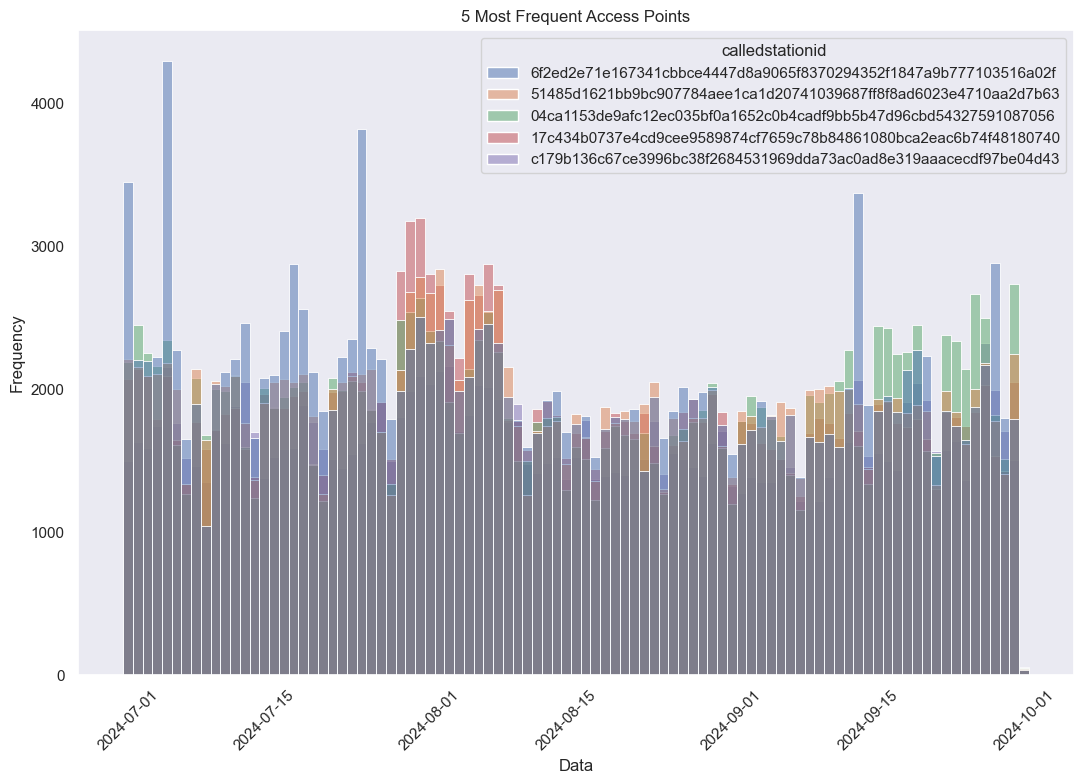

In [126]:
top_5_calledstationids = df_wifi['calledstationid'].value_counts()[:5].index
filtered_df = df_wifi[df_wifi['calledstationid'].isin(top_5_calledstationids)]

# Contar as frequências em your_hue_column e ordenar
hue_order = filtered_df['calledstationid'].value_counts().index

# Converter your_hue_column para uma categoria ordenada
filtered_df['calledstationid'] = pd.Categorical(
    filtered_df['calledstationid'],
    categories=hue_order,
    ordered=True
)

# Plotar o histograma com o hue ordenado
sns.histplot(
    data=filtered_df,
    x='date',
    hue='calledstationid',
    bins=90,
    kde=False
)

# Configurações do gráfico
plt.title("5 Most Frequent Access Points")
plt.xlabel("Data")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X, se necessário
plt.tight_layout()
plt.show()

/var/folders/ql/rtzqwrqd27qcbd5lrvxhl2940000gp/T/ipykernel_55363/210087194.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



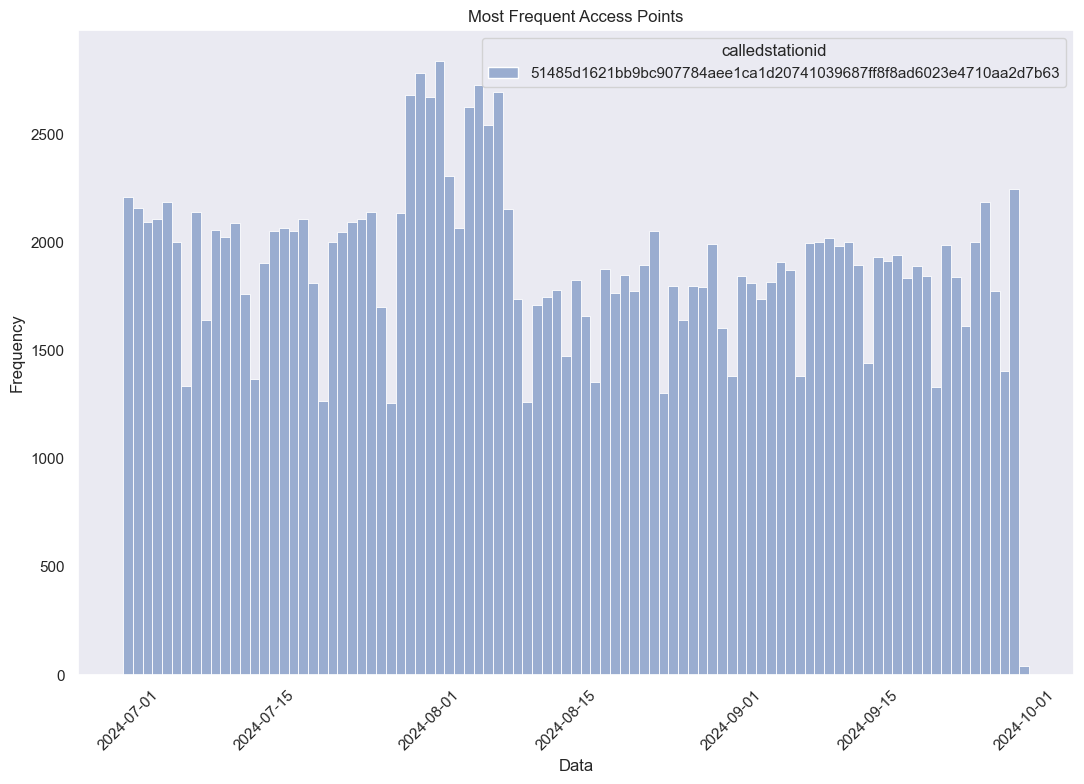

In [127]:
top_1_calledstationids = df_wifi['calledstationid'].value_counts()[1:2].index
filtered_df = df_wifi[df_wifi['calledstationid'].isin(top_1_calledstationids)]

# Contar as frequências em your_hue_column e ordenar
hue_order = filtered_df['calledstationid'].value_counts().index

# Converter your_hue_column para uma categoria ordenada
filtered_df['calledstationid'] = pd.Categorical(
    filtered_df['calledstationid'],
    categories=hue_order,
    ordered=True
)

# Plotar o histograma com o hue ordenado
sns.histplot(
    data=filtered_df,
    x='date',
    hue='calledstationid',
    bins=90,
    kde=False
)

# Configurações do gráfico
plt.title("Most Frequent Access Points")
plt.xlabel("Data")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X, se necessário
plt.tight_layout()
plt.show()

In [129]:
filtered_df_2.date.value_counts()[:5]

date
2024-08-02    2837
2024-07-31    2782
2024-08-06    2728
2024-08-08    2695
2024-07-30    2682
Name: count, dtype: int64

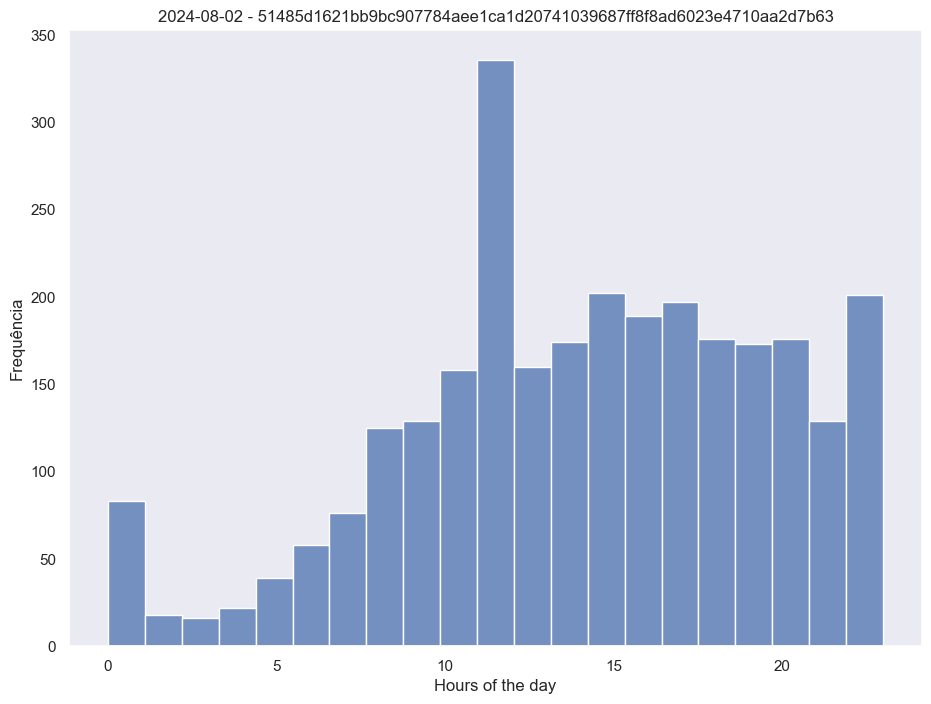

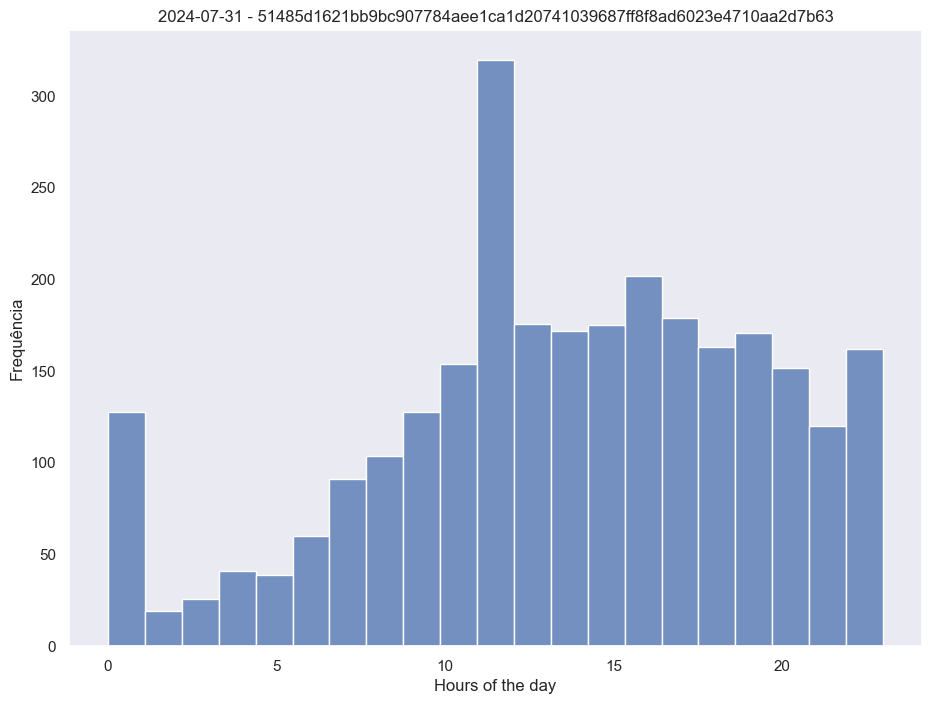

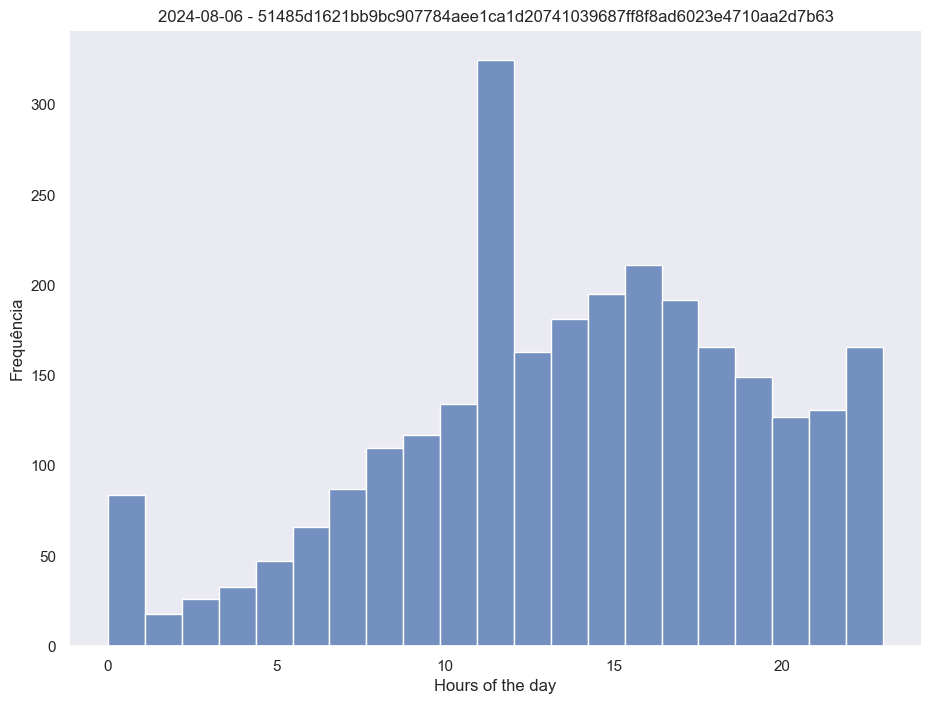

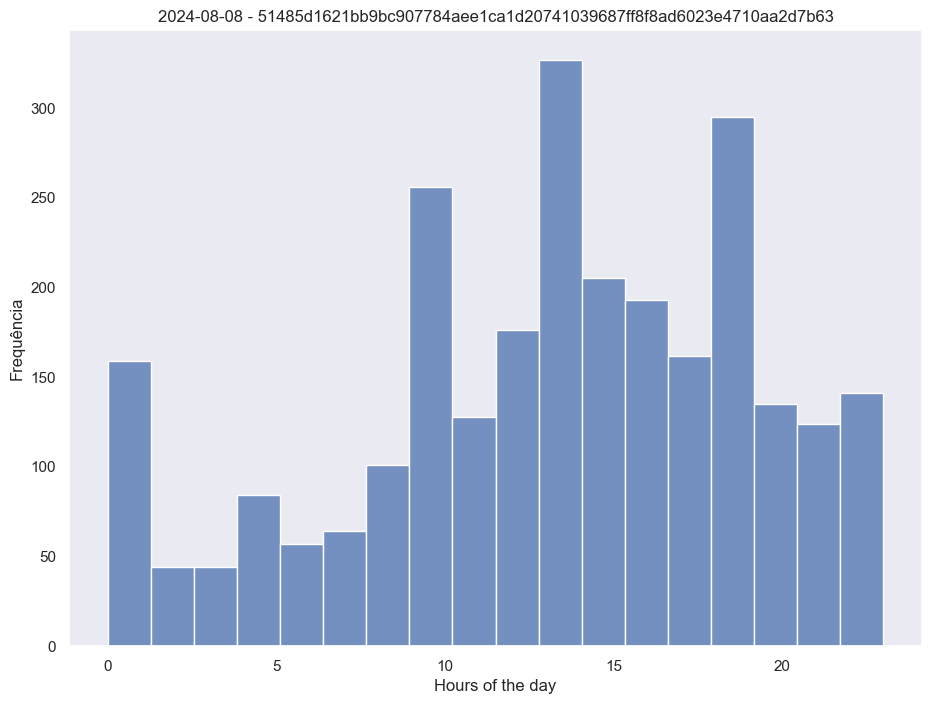

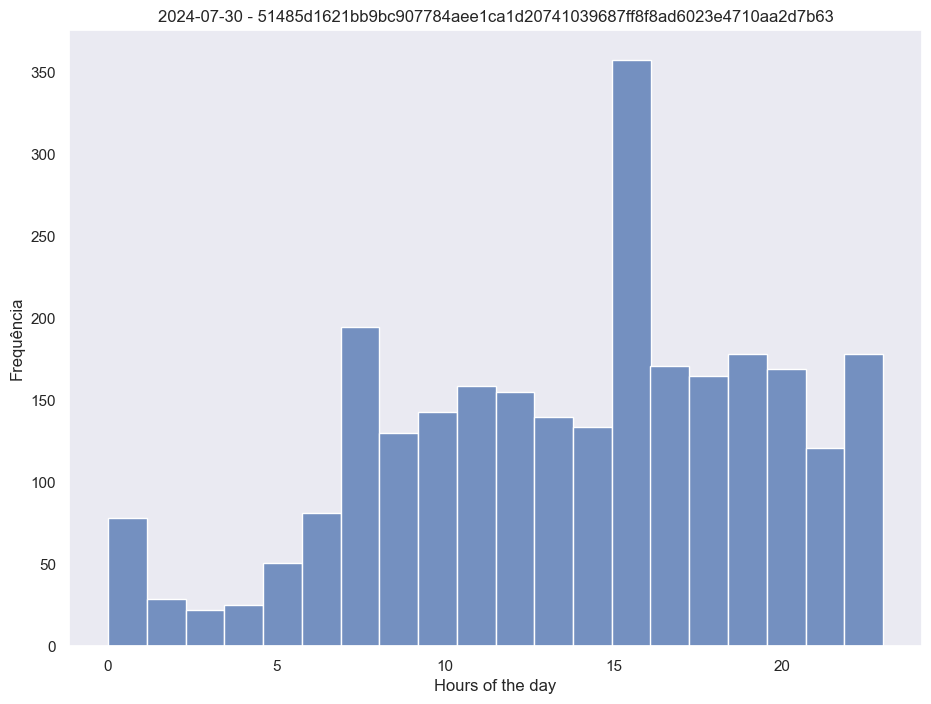

In [133]:
# plot of the most frequent access point in the most accessed days
top_1_calledstationids = df_wifi['calledstationid'].value_counts()[1:2].index
filtered_df_2 = df_wifi[df_wifi['calledstationid'].isin(top_1_calledstationids)].reset_index(drop=True)

for dt in filtered_df_2.date.value_counts()[:5].index: 
    # Plotar o histograma com o hue ordenado
    filtered_df_3 = filtered_df_2[filtered_df_2['date'].isin([dt])].reset_index(drop=True)

    sns.histplot(
        data=filtered_df_3,
        x='hour',
        kde=False
    )

    # Configurações do gráfico
    plt.title(f"{filtered_df_3.date[0]} - {filtered_df_3.calledstationid[0]}")
    plt.xlabel("Hours of the day")
    plt.ylabel("Frequência")

    # plt.xticks(range(24))  # Exibe todos os rótulos de 0 a 23 (para cada hora do dia)
    plt.show()

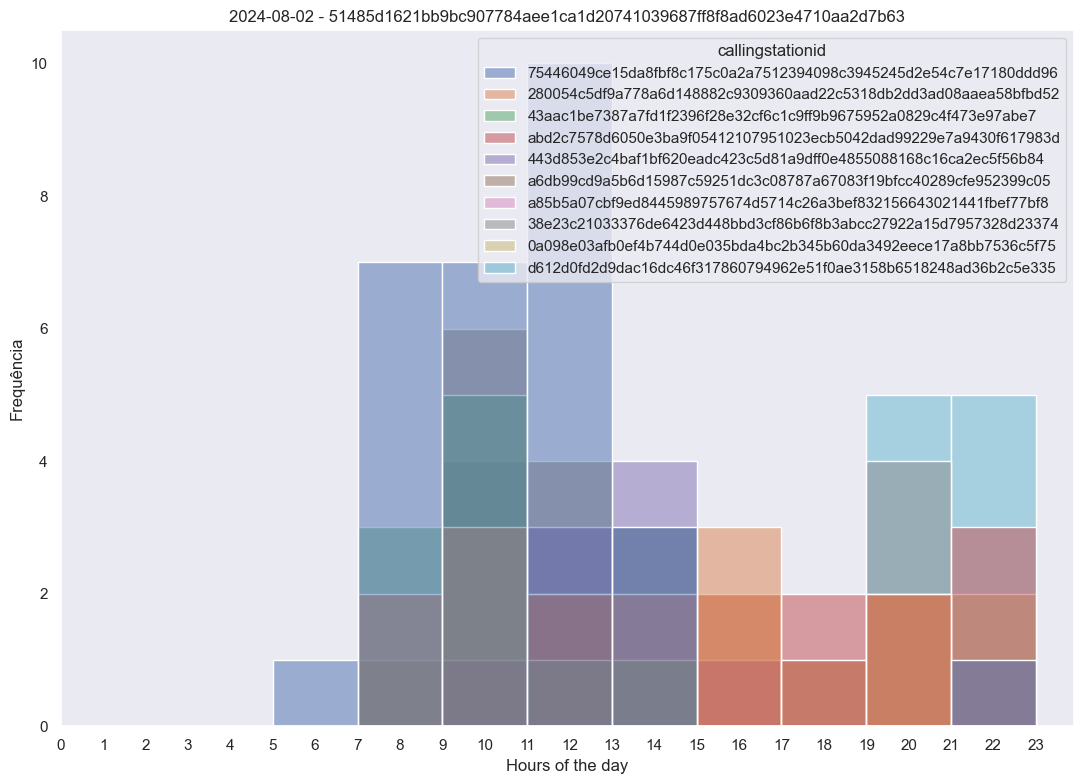

In [154]:
top_1_calledstationids = df_wifi['calledstationid'].value_counts()[1:2].index
filtered_df_2 = df_wifi[df_wifi['calledstationid'].isin(top_1_calledstationids)].reset_index(drop=True)

for dt in filtered_df_2.date.value_counts()[:1].index: 
    # Plotar o histograma com o hue ordenado
    filtered_df_3 = filtered_df_2[filtered_df_2['date'].isin([dt])]
    filtered_df_4 = filtered_df_3[filtered_df_3['callingstationid'].isin(filtered_df_3.callingstationid.value_counts()[:10].index)].reset_index(drop=True)

    sns.histplot(
        data=filtered_df_4,
        x='hour',
        hue='callingstationid',
        kde=False
    )

    # Configurações do gráfico
    plt.title(f"{filtered_df_4.date[0]} - {filtered_df_4.calledstationid[0]}")
    plt.xlabel("Hours of the day")
    plt.ylabel("Frequência")

    # Exibindo o gráfico
    plt.tight_layout()  # Para garantir que o layout do gráfico se ajuste bem

    plt.xticks(range(24))  # Exibe todos os rótulos de 0 a 23 (para cada hora do dia)
    plt.show()

In [131]:
filtered_df_3[filtered_df_3.callingstationid.isin(['6ba1ed6d5312a4db0f804cb0a9ec454e0629c0d687e268b762f792a766212447'])]

,Unnamed: 0,acctsessionid,acctstarttime,upload,download,acctsessiontime,callingstationid,calledstationid,calledstation_ssid,date,hour
8,2206754,670b79e8bd64ff7d418cc6f7556935b938099b22b7493a...,2024-07-30 08:00:00,0,5,1.0,6ba1ed6d5312a4db0f804cb0a9ec454e0629c0d687e268...,51485d1621bb9bc907784aee1ca1d20741039687ff8f8a...,Porto. Free Wi-Fi,2024-07-30,8
380,7268056,78142523922cbec2cbe21181f876fa7f4d6d60da476bb4...,2024-07-30 05:00:00,0,0,1.0,6ba1ed6d5312a4db0f804cb0a9ec454e0629c0d687e268...,51485d1621bb9bc907784aee1ca1d20741039687ff8f8a...,Porto. Free Wi-Fi,2024-07-30,5
382,7268082,b5a88900b20060418975740ac1dd883cf9cdce30bd234c...,2024-07-30 05:00:00,0,5,1.0,6ba1ed6d5312a4db0f804cb0a9ec454e0629c0d687e268...,51485d1621bb9bc907784aee1ca1d20741039687ff8f8a...,Porto. Free Wi-Fi,2024-07-30,5
385,7268129,c9a0feb2225e0c5ef2576f3f6bade4c501757042edd5f0...,2024-07-30 07:00:00,0,0,1.0,6ba1ed6d5312a4db0f804cb0a9ec454e0629c0d687e268...,51485d1621bb9bc907784aee1ca1d20741039687ff8f8a...,Porto. Free Wi-Fi,2024-07-30,7
389,7268249,35e47bbce045b99fb5632cceb6f46b32c3d4669286bbb6...,2024-07-30 11:00:00,0,0,1.0,6ba1ed6d5312a4db0f804cb0a9ec454e0629c0d687e268...,51485d1621bb9bc907784aee1ca1d20741039687ff8f8a...,Porto. Free Wi-Fi,2024-07-30,11
390,7268328,82e3b938a3f323b8d668f8c2aad9f708fd9d0b1aa9b6c1...,2024-07-30 11:00:00,0,5,1.0,6ba1ed6d5312a4db0f804cb0a9ec454e0629c0d687e268...,51485d1621bb9bc907784aee1ca1d20741039687ff8f8a...,Porto. Free Wi-Fi,2024-07-30,11
394,7268522,b73342cbaa2cb33eb92c9405f19b2179bdf5a96ac25439...,2024-07-30 05:00:00,0,2,1.0,6ba1ed6d5312a4db0f804cb0a9ec454e0629c0d687e268...,51485d1621bb9bc907784aee1ca1d20741039687ff8f8a...,Porto. Free Wi-Fi,2024-07-30,5
397,7268550,ed66ee72ce54494099df170762c3a9625be984dd016fea...,2024-07-30 07:00:00,0,0,1.0,6ba1ed6d5312a4db0f804cb0a9ec454e0629c0d687e268...,51485d1621bb9bc907784aee1ca1d20741039687ff8f8a...,Porto. Free Wi-Fi,2024-07-30,7
402,7268783,5a51c572da52fcae2c05f665c1dee87b1c79bd26c9d958...,2024-07-30 08:00:00,0,1,1.0,6ba1ed6d5312a4db0f804cb0a9ec454e0629c0d687e268...,51485d1621bb9bc907784aee1ca1d20741039687ff8f8a...,Porto. Free Wi-Fi,2024-07-30,8
415,7269712,cce523f80bba48f87238114aface6282fc882f8f2b9a58...,2024-07-30 05:00:00,0,2,1.0,6ba1ed6d5312a4db0f804cb0a9ec454e0629c0d687e268...,51485d1621bb9bc907784aee1ca1d20741039687ff8f8a...,Porto. Free Wi-Fi,2024-07-30,5


In [34]:
df_wifi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13983118 entries, 0 to 13983117
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   acctsessionid       object 
 2   acctstarttime       object 
 3   upload              int64  
 4   download            int64  
 5   acctsessiontime     float64
 6   callingstationid    object 
 7   calledstationid     object 
 8   calledstation_ssid  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 960.1+ MB


<Axes: >

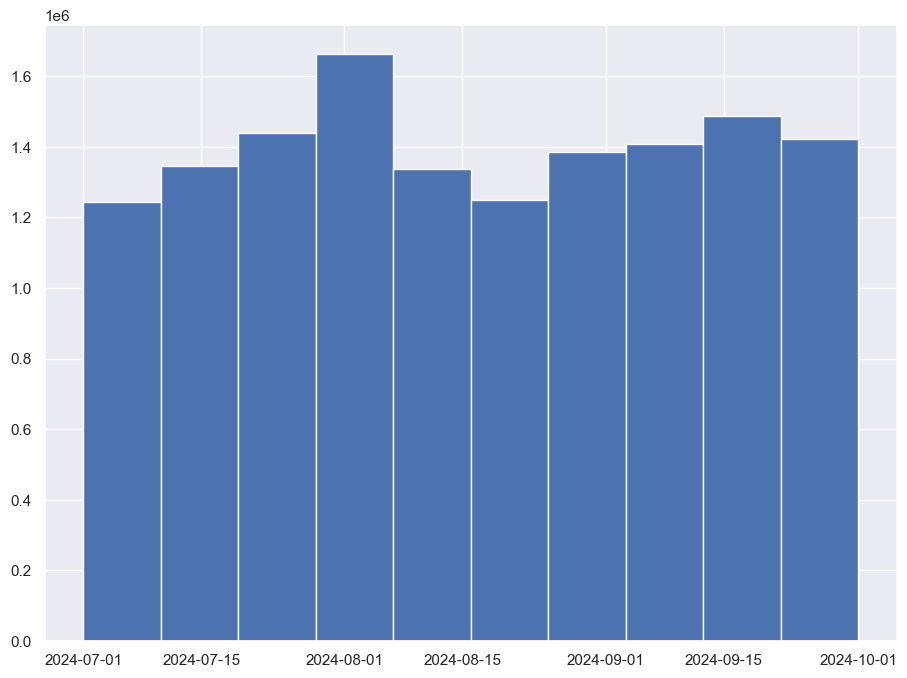

In [8]:
df_wifi["acctstarttime"].hist()

Plot of available Access Point

In [52]:
# Define the center of the map (Porto coordinates)
map_center = [41.1579, -8.6291]  # Latitude and longitude of Porto

# Create a map
porto_map = folium.Map(location=map_center, zoom_start=12)

# Add points to the map
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(porto_map)

# Save or display the map
porto_map.save("porto_hotspots.html")
porto_map

# 4 - Possible threat analysis after anonymization

### Instructions

Not all solutions are perfect - Do a threat analysis and compare the threats before and after your solution.

# 5 - Data potential and analysis

### Instructions

It is typical that during an anonymization process, there is a loss of value in terms of insights. In this section, explore the other side of the scale - What can still be done with the data that is processed and why is the risk above justifiable taking into account the potential return?

Specifically, try to imagine yourself as the city's analytics team, which uses this data to gather conclusions about the city's state and flow and try develop and demonstrate what results and analyses can be done. You can use the given data plus optionally any other data sources. If you complement with additional datasets, be it from the city Open Data Portal (https://opendata.porto.digital) or other datasets, make sure you cite and reference them explicitly.



# 5 - Conclusions and Future Work


### Instructions:

List the main conclusions focusing on the feasibility, innovation, and applicability of the solution.

In addition, describe the future work still necessary if this solution were to continue: What would the next steps be? What limitations do the data have for implementing the solution? How can the data be improved? How could this solution be improved? What other ideas could be included/analyzed? What other types of data could be used? What other methodologies could be experimented with?

# 6 - References

### Instructions:

Provide the relevant references for materials and/or sources used (reports, articles, external data sources, etc.).


# 9 - Annex